In [2]:
import os
import sys
import time
import numpy as np
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

from sklearn.cross_validation import train_test_split
# true, then pred
from sklearn.metrics import log_loss
from sklearn import preprocessing
from sklearn.grid_search import GridSearchCV

from sklearn.preprocessing import PolynomialFeatures

from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('white')
sns.set_context('notebook')

import pickle
from sklearn.externals import joblib

In [3]:
from sknn.mlp import Classifier, Layer

In [4]:
import amyutility as p2

In [5]:
reload(p2)

<module 'amyutility' from 'amyutility.pyc'>

# Load Data

In [6]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [7]:
print train.shape
print test.shape

(43436, 23)
(14479, 23)


In [8]:
traink = pd.read_csv('data/fromKen/full_train_2.csv')
testk = pd.read_csv('data/fromKen/full_test_2.csv')

In [9]:
print traink.shape
print testk.shape

(43436, 56)
(14479, 55)


# Data Exploration

In [10]:
test.head()

,age,sex,region,nregions,memtype,memmonths,mem_mag1,mem_mag2,hasemail,r1,r2,r3,r.quick,extra,intl,r.intl,allgames1yr,allgames5yr,fastevents,medevents,slowevents,nfloor,Id
0,29.00,M,reg127,1,N,2,Y,N,N,nan,nan,2024.00,nan,N,N,nan,0,0,0,0,0,0,1
1,16.00,M,reg142,1,N,258,N,N,Y,2753.00,2751.00,2709.00,3528.00,N,N,nan,10,223,0,57,7,0,2
2,22.00,M,reg104,1,N,28,N,N,Y,nan,nan,1668.00,2910.00,N,N,nan,6,6,2,1,0,0,3
3,10.00,M,reg112,1,N,14,N,N,Y,nan,nan,741.00,1107.00,N,N,nan,13,13,0,2,1,0,4
4,14.00,F,reg106,1,N,131,N,N,N,359.00,325.00,531.00,654.00,N,N,nan,14,57,0,16,1,0,5


In [11]:
train.columns

Index([u'lapsed', u'age', u'sex', u'region', u'nregions', u'memtype', u'memmonths', u'mem_mag1', u'mem_mag2', u'hasemail', u'r1', u'r2', u'r3', u'r.quick', u'extra', u'intl', u'r.intl', u'allgames1yr', u'allgames5yr', u'fastevents', u'medevents', u'slowevents', u'nfloor'], dtype='object')

## Using Ken's Data

In [12]:
traink.columns

Index([u'lapsed', u'age', u'sex', u'region', u'nregions', u'memtype', u'memmonths', u'mem_mag1', u'mem_mag2', u'hasemail', u'r1', u'r2', u'r3', u'r.quick', u'extra', u'intl', u'r.intl', u'allgames1yr', u'allgames5yr', u'fastevents', u'medevents', u'slowevents', u'nfloor', u'age.na', u'r1.na', u'r2.na', u'r3.na', u'r.quick.na', u'r.intl.na', u'mon_less30', u'mon_31', u'mon_32', u'mon_33', u'mon_34', u'mon_35', u'mon_36', u'mon_37_60', u'mon_61_84', u'mon_85_120', u'mon_121_263', u'mon_264_plus',
       u'games_0', u'games_1_5', u'games_6_10', u'games_11_20', u'games_21_34', u'games_35_49', u'games_50_plus', u'agesq', u'agecbd', u'allgames1yrsq', u'allgames1yrcbd', u'allgames5yrsq', u'allgames5yrcbd', u'memmonthssq', u'memmonthscbd'],
      dtype='object')

In [13]:
testk.columns

Index([u'age', u'sex', u'region', u'nregions', u'memtype', u'memmonths', u'mem_mag1', u'mem_mag2', u'hasemail', u'r1', u'r2', u'r3', u'r.quick', u'extra', u'intl', u'r.intl', u'allgames1yr', u'allgames5yr', u'fastevents', u'medevents', u'slowevents', u'nfloor', u'age.na', u'r1.na', u'r2.na', u'r3.na', u'r.quick.na', u'r.intl.na', u'mon_less30', u'mon_31', u'mon_32', u'mon_33', u'mon_34', u'mon_35', u'mon_36', u'mon_37_60', u'mon_61_84', u'mon_85_120', u'mon_121_263', u'mon_264_plus',
       u'games_0', u'games_1_5', u'games_6_10', u'games_11_20', u'games_21_34', u'games_35_49', u'games_50_plus', u'agesq', u'agecbd', u'allgames1yrsq', u'allgames1yrcbd', u'allgames5yrsq', u'allgames5yrcbd', u'memmonthssq', u'memmonthscbd'],
      dtype='object')

In [14]:
traink.head()

,lapsed,age,sex,region,nregions,memtype,memmonths,mem_mag1,mem_mag2,hasemail,r1,r2,r3,r.quick,extra,intl,r.intl,allgames1yr,allgames5yr,fastevents,medevents,slowevents,nfloor,age.na,r1.na,r2.na,r3.na,r.quick.na,r.intl.na,mon_less30,mon_31,mon_32,mon_33,mon_34,mon_35,mon_36,mon_37_60,mon_61_84,mon_85_120,mon_121_263,mon_264_plus,games_0,games_1_5,games_6_10,games_11_20,games_21_34,games_35_49,games_50_plus,agesq,agecbd,allgames1yrsq,allgames1yrcbd,allgames5yrsq,allgames5yrcbd,memmonthssq,memmonthscbd
0,Y,11.00,M,0.12,1,N,19,N,N,N,1942.12,1811.61,1557.56,2007.74,N,N,3477.56,0,0,0,0,0,0,0,1,1,1,1,1,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,4.97,7.45,0.00,0.00,0.00,0.00,5.99,8.99
1,N,61.00,M,0.12,1,N,198,Y,N,Y,2178.00,2215.00,2291.00,2932.00,Y,N,3477.56,4,29,1,0,10,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,8.25,12.38,3.22,4.83,6.80,10.20,10.59,15.88
2,Y,16.00,F,0.12,1,N,192,N,N,Y,627.00,628.00,1362.00,2007.00,N,N,3477.56,29,29,0,4,1,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,5.67,8.50,6.80,10.20,6.80,10.20,10.53,15.79
3,Y,47.00,M,0.12,1,N,268,Y,N,Y,2600.00,2601.00,2602.00,2007.74,N,N,3477.56,0,0,0,0,0,0,0,0,0,0,1,1,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,7.74,11.61,0.00,0.00,0.00,0.00,11.19,16.78
4,Y,11.00,F,0.12,1,N,101,N,N,N,464.00,466.00,958.00,1356.00,N,N,3477.56,12,35,0,8,0,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,4.97,7.45,5.13,7.69,7.17,10.75,9.25,13.87


In [15]:
testk.head()

,age,sex,region,nregions,memtype,memmonths,mem_mag1,mem_mag2,hasemail,r1,r2,r3,r.quick,extra,intl,r.intl,allgames1yr,allgames5yr,fastevents,medevents,slowevents,nfloor,age.na,r1.na,r2.na,r3.na,r.quick.na,r.intl.na,mon_less30,mon_31,mon_32,mon_33,mon_34,mon_35,mon_36,mon_37_60,mon_61_84,mon_85_120,mon_121_263,mon_264_plus,games_0,games_1_5,games_6_10,games_11_20,games_21_34,games_35_49,games_50_plus,agesq,agecbd,allgames1yrsq,allgames1yrcbd,allgames5yrsq,allgames5yrcbd,memmonthssq,memmonthscbd
0,29.00,M,0.11,1,N,2,Y,N,N,1942.12,1811.61,2024.00,2007.74,N,N,3477.56,0,0,0,0,0,0,0,1,1,0,1,1,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,6.80,10.20,0.00,0.00,0.00,0.00,2.20,3.30
1,16.00,M,0.02,1,N,258,N,N,Y,2753.00,2751.00,2709.00,3528.00,N,N,3477.56,10,223,0,57,7,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,5.67,8.50,4.80,7.19,10.82,16.23,11.11,16.67
2,22.00,M,0.00,1,N,28,N,N,Y,1942.12,1811.61,1668.00,2910.00,N,N,3477.56,6,6,2,1,0,0,0,1,1,0,0,1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,6.27,9.41,3.89,5.84,3.89,5.84,6.73,10.10
3,10.00,M,0.12,1,N,14,N,N,Y,1942.12,1811.61,741.00,1107.00,N,N,3477.56,13,13,0,2,1,0,0,1,1,0,0,1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,4.80,7.19,5.28,7.92,5.28,7.92,5.42,8.12
4,14.00,F,0.04,1,N,131,N,N,N,359.00,325.00,531.00,654.00,N,N,3477.56,14,57,0,16,1,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,5.42,8.12,5.42,8.12,8.12,12.18,9.77,14.65


In [16]:
traink_y = traink[['lapsed']]

In [17]:
traink_y.head()

,lapsed
0,Y
1,N
2,Y
3,Y
4,Y


In [18]:
traink_x = traink.drop('lapsed', axis=1)

In [19]:
traink_x.shape

(43436, 55)

In [20]:
traink_x.head()

,age,sex,region,nregions,memtype,memmonths,mem_mag1,mem_mag2,hasemail,r1,r2,r3,r.quick,extra,intl,r.intl,allgames1yr,allgames5yr,fastevents,medevents,slowevents,nfloor,age.na,r1.na,r2.na,r3.na,r.quick.na,r.intl.na,mon_less30,mon_31,mon_32,mon_33,mon_34,mon_35,mon_36,mon_37_60,mon_61_84,mon_85_120,mon_121_263,mon_264_plus,games_0,games_1_5,games_6_10,games_11_20,games_21_34,games_35_49,games_50_plus,agesq,agecbd,allgames1yrsq,allgames1yrcbd,allgames5yrsq,allgames5yrcbd,memmonthssq,memmonthscbd
0,11.00,M,0.12,1,N,19,N,N,N,1942.12,1811.61,1557.56,2007.74,N,N,3477.56,0,0,0,0,0,0,0,1,1,1,1,1,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,4.97,7.45,0.00,0.00,0.00,0.00,5.99,8.99
1,61.00,M,0.12,1,N,198,Y,N,Y,2178.00,2215.00,2291.00,2932.00,Y,N,3477.56,4,29,1,0,10,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,8.25,12.38,3.22,4.83,6.80,10.20,10.59,15.88
2,16.00,F,0.12,1,N,192,N,N,Y,627.00,628.00,1362.00,2007.00,N,N,3477.56,29,29,0,4,1,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,5.67,8.50,6.80,10.20,6.80,10.20,10.53,15.79
3,47.00,M,0.12,1,N,268,Y,N,Y,2600.00,2601.00,2602.00,2007.74,N,N,3477.56,0,0,0,0,0,0,0,0,0,0,1,1,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,7.74,11.61,0.00,0.00,0.00,0.00,11.19,16.78
4,11.00,F,0.12,1,N,101,N,N,N,464.00,466.00,958.00,1356.00,N,N,3477.56,12,35,0,8,0,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,4.97,7.45,5.13,7.69,7.17,10.75,9.25,13.87


In [21]:
train_y = (traink_y.lapsed.values=='Y')*1

In [22]:
# key train_y
train_y

array([1, 0, 1, ..., 0, 1, 0])

In [23]:
# key test_ids: for writing to predictions
test_ids = test.Id.values
test_ids

array([    1,     2,     3, ..., 14477, 14478, 14479])

In [24]:
# key df_all: combine test and train into df_all, test_idx 
test_idx = traink_x.shape[0]
df_all = pd.concat((traink_x, testk), axis=0)

In [25]:
print df_all.shape
print test_idx

(57915, 55)
43436


#### Key: 
- df_all
- test_idx
- train_y
- test_ids

## Check Types and Convert

- need to convert sex, memtype, mem_mag1, mem_mag2, hasemail, extra, intl
- Can leave bools alone

In [26]:
# CONVERT = ['sex', 'memtype', 'mem_mag1', 'mem_mag2', 'hasemail', 'extra', 'intl']

### sex

- males 0
- females 1

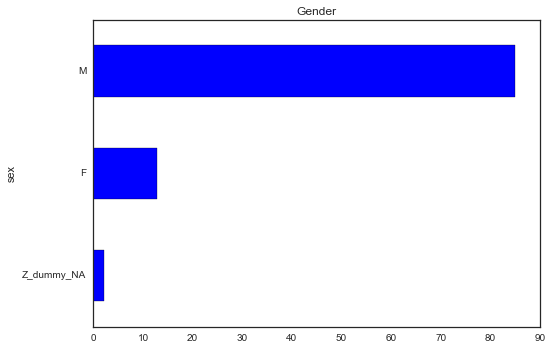

In [27]:
# mostly male (males 0, females 1)
gender = df_all.groupby('sex').size().sort_values(ascending = True)/df_all.shape[0]*100
gender.plot(kind='barh', title = 'Gender')
plt.show()

In [28]:
df_all.head()

,age,sex,region,nregions,memtype,memmonths,mem_mag1,mem_mag2,hasemail,r1,r2,r3,r.quick,extra,intl,r.intl,allgames1yr,allgames5yr,fastevents,medevents,slowevents,nfloor,age.na,r1.na,r2.na,r3.na,r.quick.na,r.intl.na,mon_less30,mon_31,mon_32,mon_33,mon_34,mon_35,mon_36,mon_37_60,mon_61_84,mon_85_120,mon_121_263,mon_264_plus,games_0,games_1_5,games_6_10,games_11_20,games_21_34,games_35_49,games_50_plus,agesq,agecbd,allgames1yrsq,allgames1yrcbd,allgames5yrsq,allgames5yrcbd,memmonthssq,memmonthscbd
0,11.00,M,0.12,1,N,19,N,N,N,1942.12,1811.61,1557.56,2007.74,N,N,3477.56,0,0,0,0,0,0,0,1,1,1,1,1,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,4.97,7.45,0.00,0.00,0.00,0.00,5.99,8.99
1,61.00,M,0.12,1,N,198,Y,N,Y,2178.00,2215.00,2291.00,2932.00,Y,N,3477.56,4,29,1,0,10,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,8.25,12.38,3.22,4.83,6.80,10.20,10.59,15.88
2,16.00,F,0.12,1,N,192,N,N,Y,627.00,628.00,1362.00,2007.00,N,N,3477.56,29,29,0,4,1,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,5.67,8.50,6.80,10.20,6.80,10.20,10.53,15.79
3,47.00,M,0.12,1,N,268,Y,N,Y,2600.00,2601.00,2602.00,2007.74,N,N,3477.56,0,0,0,0,0,0,0,0,0,0,1,1,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,7.74,11.61,0.00,0.00,0.00,0.00,11.19,16.78
4,11.00,F,0.12,1,N,101,N,N,N,464.00,466.00,958.00,1356.00,N,N,3477.56,12,35,0,8,0,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,4.97,7.45,5.13,7.69,7.17,10.75,9.25,13.87


In [29]:
df_all.dtypes

age               float64
sex                object
region            float64
nregions            int64
memtype            object
memmonths           int64
mem_mag1           object
mem_mag2           object
hasemail           object
r1                float64
r2                float64
r3                float64
r.quick           float64
extra              object
intl               object
r.intl            float64
allgames1yr         int64
allgames5yr         int64
fastevents          int64
medevents           int64
slowevents          int64
nfloor              int64
age.na              int64
r1.na               int64
r2.na               int64
r3.na               int64
r.quick.na          int64
r.intl.na           int64
mon_less30           bool
mon_31               bool
mon_32               bool
mon_33               bool
mon_34               bool
mon_35               bool
mon_36               bool
mon_37_60            bool
mon_61_84            bool
mon_85_120           bool
mon_121_263 

In [30]:
df_all['sex']

0                 M
1                 M
2                 F
3                 M
4                 F
5                 F
6                 M
7                 M
8                 M
9                 M
10                M
11                M
12                M
13                M
14                M
15                F
16                M
17                M
18                F
19                M
20                M
21                F
22                M
23                M
24                M
25                M
26                M
27                M
28                F
29                M
30                M
31                M
32                M
33                F
34                M
35                M
36                M
37                M
38                M
39                F
40                M
41                M
42                M
43                F
44                M
45                M
46                M
47                M
48                M
49                M


In [31]:
df_all.sex = (df_all.sex.values=='F')*1

In [32]:
df_all.head()

,age,sex,region,nregions,memtype,memmonths,mem_mag1,mem_mag2,hasemail,r1,r2,r3,r.quick,extra,intl,r.intl,allgames1yr,allgames5yr,fastevents,medevents,slowevents,nfloor,age.na,r1.na,r2.na,r3.na,r.quick.na,r.intl.na,mon_less30,mon_31,mon_32,mon_33,mon_34,mon_35,mon_36,mon_37_60,mon_61_84,mon_85_120,mon_121_263,mon_264_plus,games_0,games_1_5,games_6_10,games_11_20,games_21_34,games_35_49,games_50_plus,agesq,agecbd,allgames1yrsq,allgames1yrcbd,allgames5yrsq,allgames5yrcbd,memmonthssq,memmonthscbd
0,11.00,0,0.12,1,N,19,N,N,N,1942.12,1811.61,1557.56,2007.74,N,N,3477.56,0,0,0,0,0,0,0,1,1,1,1,1,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,4.97,7.45,0.00,0.00,0.00,0.00,5.99,8.99
1,61.00,0,0.12,1,N,198,Y,N,Y,2178.00,2215.00,2291.00,2932.00,Y,N,3477.56,4,29,1,0,10,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,8.25,12.38,3.22,4.83,6.80,10.20,10.59,15.88
2,16.00,1,0.12,1,N,192,N,N,Y,627.00,628.00,1362.00,2007.00,N,N,3477.56,29,29,0,4,1,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,5.67,8.50,6.80,10.20,6.80,10.20,10.53,15.79
3,47.00,0,0.12,1,N,268,Y,N,Y,2600.00,2601.00,2602.00,2007.74,N,N,3477.56,0,0,0,0,0,0,0,0,0,0,1,1,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,7.74,11.61,0.00,0.00,0.00,0.00,11.19,16.78
4,11.00,1,0.12,1,N,101,N,N,N,464.00,466.00,958.00,1356.00,N,N,3477.56,12,35,0,8,0,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,4.97,7.45,5.13,7.69,7.17,10.75,9.25,13.87


### memtype
- make Normal the reference category
- memtypeA=1 for affiliate
- memtypeF=1 for family

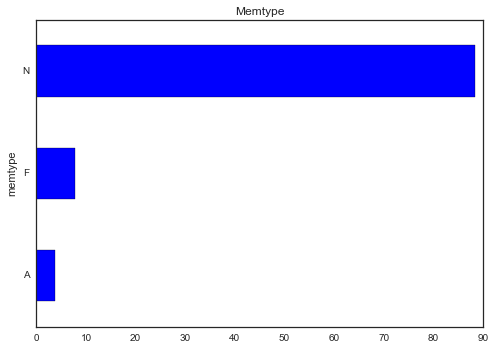

In [33]:
# membership types A, F, N 
memtype = df_all.groupby('memtype').size().sort_values(ascending = True)/df_all.shape[0]*100
memtype.plot(kind='barh', title = 'Memtype')
plt.show()

In [34]:
df_all['memtypeA'] = (df_all.memtype=='A')*1

In [35]:
df_all['memtypeF'] = (df_all.memtype=='F')*1

In [36]:
df_all = df_all.drop('memtype', axis=1)

### mem_mag1 & mem_mag2 & hasemail

- only yes or no... convert yes to 1, no to 0

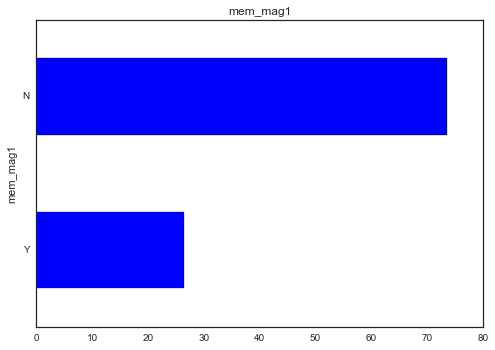

In [37]:
memmag1 = df_all.groupby('mem_mag1').size().sort_values(ascending = True)/df_all.shape[0]*100
memmag1.plot(kind='barh', title = 'mem_mag1')
plt.show()

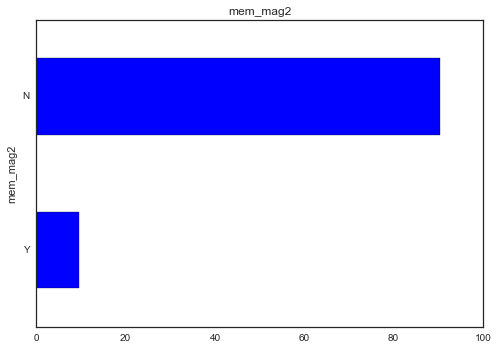

In [38]:
memmag2 = df_all.groupby('mem_mag2').size().sort_values(ascending = True)/df_all.shape[0]*100
memmag2.plot(kind='barh', title = 'mem_mag2')
plt.show()

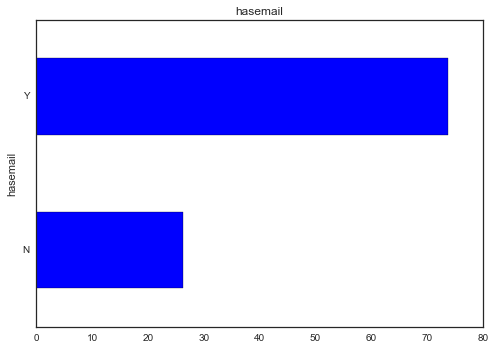

In [39]:
hasemail = df_all.groupby('hasemail').size().sort_values(ascending = True)/df_all.shape[0]*100
hasemail.plot(kind='barh', title = 'hasemail')
plt.show()

In [40]:
df_all.mem_mag1 = (df_all.mem_mag1.values=='Y')*1
df_all.mem_mag2 = (df_all.mem_mag2.values=='Y')*1

In [41]:
df_all.hasemail = (df_all.hasemail.values=='Y')*1

In [42]:
df_all.head()

,age,sex,region,nregions,memmonths,mem_mag1,mem_mag2,hasemail,r1,r2,r3,r.quick,extra,intl,r.intl,allgames1yr,allgames5yr,fastevents,medevents,slowevents,nfloor,age.na,r1.na,r2.na,r3.na,r.quick.na,r.intl.na,mon_less30,mon_31,mon_32,mon_33,mon_34,mon_35,mon_36,mon_37_60,mon_61_84,mon_85_120,mon_121_263,mon_264_plus,games_0,games_1_5,games_6_10,games_11_20,games_21_34,games_35_49,games_50_plus,agesq,agecbd,allgames1yrsq,allgames1yrcbd,allgames5yrsq,allgames5yrcbd,memmonthssq,memmonthscbd,memtypeA,memtypeF
0,11.00,0,0.12,1,19,0,0,0,1942.12,1811.61,1557.56,2007.74,N,N,3477.56,0,0,0,0,0,0,0,1,1,1,1,1,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,4.97,7.45,0.00,0.00,0.00,0.00,5.99,8.99,0,0
1,61.00,0,0.12,1,198,1,0,1,2178.00,2215.00,2291.00,2932.00,Y,N,3477.56,4,29,1,0,10,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,8.25,12.38,3.22,4.83,6.80,10.20,10.59,15.88,0,0
2,16.00,1,0.12,1,192,0,0,1,627.00,628.00,1362.00,2007.00,N,N,3477.56,29,29,0,4,1,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,5.67,8.50,6.80,10.20,6.80,10.20,10.53,15.79,0,0
3,47.00,0,0.12,1,268,1,0,1,2600.00,2601.00,2602.00,2007.74,N,N,3477.56,0,0,0,0,0,0,0,0,0,0,1,1,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,7.74,11.61,0.00,0.00,0.00,0.00,11.19,16.78,0,0
4,11.00,1,0.12,1,101,0,0,0,464.00,466.00,958.00,1356.00,N,N,3477.56,12,35,0,8,0,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,4.97,7.45,5.13,7.69,7.17,10.75,9.25,13.87,0,0


### extra, intl

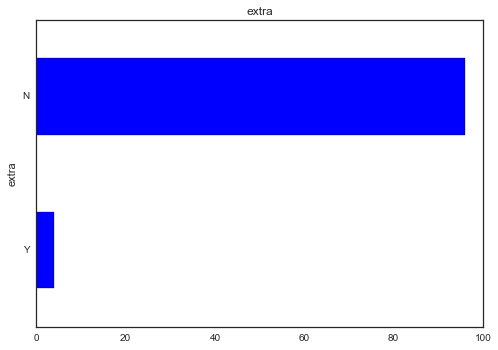

In [43]:
extra = df_all.groupby('extra').size().sort_values(ascending = True)/df_all.shape[0]*100
extra.plot(kind='barh', title = 'extra')
plt.show()

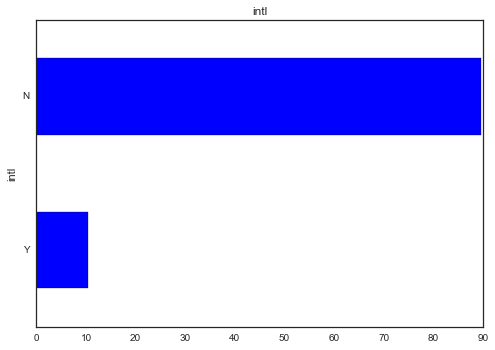

In [44]:
intl = df_all.groupby('intl').size().sort_values(ascending = True)/df_all.shape[0]*100
intl.plot(kind='barh', title = 'intl')
plt.show()

In [45]:
df_all.extra = (df_all.extra.values=='Y')*1
df_all.intl = (df_all.intl.values=='Y')*1

In [46]:
df_all.head()

,age,sex,region,nregions,memmonths,mem_mag1,mem_mag2,hasemail,r1,r2,r3,r.quick,extra,intl,r.intl,allgames1yr,allgames5yr,fastevents,medevents,slowevents,nfloor,age.na,r1.na,r2.na,r3.na,r.quick.na,r.intl.na,mon_less30,mon_31,mon_32,mon_33,mon_34,mon_35,mon_36,mon_37_60,mon_61_84,mon_85_120,mon_121_263,mon_264_plus,games_0,games_1_5,games_6_10,games_11_20,games_21_34,games_35_49,games_50_plus,agesq,agecbd,allgames1yrsq,allgames1yrcbd,allgames5yrsq,allgames5yrcbd,memmonthssq,memmonthscbd,memtypeA,memtypeF
0,11.00,0,0.12,1,19,0,0,0,1942.12,1811.61,1557.56,2007.74,0,0,3477.56,0,0,0,0,0,0,0,1,1,1,1,1,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,4.97,7.45,0.00,0.00,0.00,0.00,5.99,8.99,0,0
1,61.00,0,0.12,1,198,1,0,1,2178.00,2215.00,2291.00,2932.00,1,0,3477.56,4,29,1,0,10,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,8.25,12.38,3.22,4.83,6.80,10.20,10.59,15.88,0,0
2,16.00,1,0.12,1,192,0,0,1,627.00,628.00,1362.00,2007.00,0,0,3477.56,29,29,0,4,1,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,5.67,8.50,6.80,10.20,6.80,10.20,10.53,15.79,0,0
3,47.00,0,0.12,1,268,1,0,1,2600.00,2601.00,2602.00,2007.74,0,0,3477.56,0,0,0,0,0,0,0,0,0,0,1,1,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,7.74,11.61,0.00,0.00,0.00,0.00,11.19,16.78,0,0
4,11.00,1,0.12,1,101,0,0,0,464.00,466.00,958.00,1356.00,0,0,3477.56,12,35,0,8,0,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,4.97,7.45,5.13,7.69,7.17,10.75,9.25,13.87,0,0


# Feature Engineering

#### % change in chess rankings

In [47]:
df_all['r3r2'] = df_all.r3 / df_all.r2 -1

In [48]:
df_all['r3r1'] = df_all.r3 / df_all.r1 -1

In [49]:
df_all['allgames_change'] = df_all.allgames1yr/((df_all.allgames5yr - df_all.allgames1yr + 1)/4)-1

In [50]:
df_all['fastevets_prop'] = df_all.fastevents / (df_all.fastevents + df_all.medevents + df_all.slowevents+0.01)

In [51]:
df_all['medevents_prop'] = df_all.medevents / (df_all.fastevents + df_all.medevents + df_all.slowevents+0.01)

In [52]:
df_all['slowevents_prop'] = df_all.slowevents / (df_all.fastevents + df_all.medevents + df_all.slowevents+0.01)

In [53]:
# TODO region is discrete?? 
# last 8 are sq and cubed terms 
STANDARDIZE = ['age', 'region', 'nregions', 'memmonths', 'r1', 'r2', 'r3', 'r.quick', 'r.intl', 
               'allgames1yr', 'allgames5yr', 'fastevents', 'medevents', 'slowevents', 'nfloor', 
              'agesq', 'agecbd', 'allgames1yrsq', 'allgames1yrcbd', 'allgames5yrsq', 'allgames5yrcbd', 'memmonthssq', 
               'memmonthscbd', 'r3r2', 'r3r1', 'allgames_change', 'fastevets_prop', 'medevents_prop', 'slowevents_prop']


INDICATORS = ['sex', 'mem_mag1', 'mem_mag2', 'hasemail', 'extra', 'intl', 'age.na', 'r1.na', 'r2.na', 
             'r3.na', 'r.quick.na', 'r.intl.na', 'mon_less30', 'mon_31', 'mon_32', 'mon_33', 'mon_34', 
             'mon_35', 'mon_36', 'mon_37_60', 'mon_61_84', 'mon_85_120', 'mon_121_263', 'mon_264_plus', 
             'games_0', 'games_1_5', 'games_6_10', 'games_11_20', 'games_21_34', 'games_35_49', 'games_50_plus', 
             'memtypeA', 'memtypeF']

In [54]:
len(STANDARDIZE) + len(INDICATORS)

62

In [55]:
df_all.shape[1]

62

# Standardize Data

In [56]:
std_scale = preprocessing.StandardScaler().fit(df_all[STANDARDIZE])
std = std_scale.transform(df_all[STANDARDIZE])
df_all[STANDARDIZE] = std

In [57]:
df_all.head()

,age,sex,region,nregions,memmonths,mem_mag1,mem_mag2,hasemail,r1,r2,r3,r.quick,extra,intl,r.intl,allgames1yr,allgames5yr,fastevents,medevents,slowevents,nfloor,age.na,r1.na,r2.na,r3.na,r.quick.na,r.intl.na,mon_less30,mon_31,mon_32,mon_33,mon_34,mon_35,mon_36,mon_37_60,mon_61_84,mon_85_120,mon_121_263,mon_264_plus,games_0,games_1_5,games_6_10,games_11_20,games_21_34,games_35_49,games_50_plus,agesq,agecbd,allgames1yrsq,allgames1yrcbd,allgames5yrsq,allgames5yrcbd,memmonthssq,memmonthscbd,memtypeA,memtypeF,r3r2,r3r1,allgames_change,fastevets_prop,medevents_prop,slowevents_prop
0,-0.62,0,1.58,-0.18,-0.71,0,0,0,-0.01,-0.00,-0.00,-0.00,0,0,-0.00,-0.62,-0.52,-0.16,-0.46,-0.34,-0.07,0,1,1,1,1,1,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,-0.63,-0.63,-1.36,-1.36,-1.57,-1.57,-0.78,-0.78,0,0,-0.11,-0.11,-0.45,-0.29,-1.39,-0.61
1,1.91,0,1.58,-0.18,0.52,1,0,1,0.35,0.53,0.79,0.79,1,0,-0.00,-0.45,-0.19,0.00,-0.46,0.50,-0.07,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,1.74,1.74,-0.19,-0.19,0.45,0.45,0.92,0.92,0,0,0.24,0.29,-0.43,0.34,-1.39,2.21
2,-0.37,1,1.58,-0.18,0.48,0,0,1,-2.00,-1.58,-0.21,-0.00,0,0,-0.00,0.65,-0.19,-0.16,-0.22,-0.26,-0.07,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,-0.13,-0.13,1.11,1.11,0.45,0.45,0.90,0.90,0,0,2.48,2.10,2.91,-0.29,0.48,0.01
3,1.20,0,1.58,-0.18,1.00,1,0,1,0.99,1.05,1.12,-0.00,0,0,-0.00,-0.62,-0.52,-0.16,-0.46,-0.34,-0.07,0,0,0,0,1,1,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,1.37,1.37,-1.36,-1.36,-1.57,-1.57,1.14,1.14,0,0,0.17,0.21,-0.45,-0.29,-1.39,-0.61
4,-0.62,1,1.58,-0.18,-0.15,0,0,0,-2.24,-1.79,-0.65,-0.56,0,0,-0.00,-0.10,-0.13,-0.16,0.03,-0.34,-0.07,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,-0.63,-0.63,0.50,0.50,0.56,0.56,0.43,0.43,0,0,2.26,1.93,-0.39,-0.29,0.94,-0.61


## Utility Functions

In [ ]:
# Females
importance_list = clfForest.feature_importances_
name_list = all_features
importance_list, name_list = zip(*sorted(zip(importance_list, name_list)))
# just get top (in reverse order)
top_imp = importance_list[-20:]
top_names = name_list[-20:]
plt.barh(range(len(top_names)),top_imp,align='center')
plt.yticks(range(len(top_names)),top_names)
plt.xlabel('Relative Importance in the Random Forest')
plt.ylabel('Features')
plt.title('Relative importance of Top 20 Features for Females')
plt.show()

# Modeling

In [58]:
track_dict = {}

df_all
test_idx
train_y
test_ids

## Gradient Boosting Trees

In [60]:
# parameters
estimators = [250, 500, 1000] # default = 10
features = [0.6, 0.75, 0.9] # default = 'sqrt'
samples = [25, 35, 45] # default = 1
max_depth = [2, 3, 5]

for e in estimators:
    for f in features: 
        for s in samples: 
            for d in max_depth: 
                modelboost = GradientBoostingClassifier(n_estimators=e, max_features=f, min_samples_leaf=s, 
                                                   max_depth=d)
                p2.get_pred_np(modelboost, df_all, train_y, 'RFBoost', track_dict=None, 
                            test_idx=test_idx, train_size=0.8, columns=None, parameters=None, 
                            score_func='log_loss', predict=False)


# option to save fitted model
# joblib.dump(model, 'models/baseline_logistic.pkl')

############
GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=2, max_features=0.6, max_leaf_nodes=None,
              min_samples_leaf=25, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=250,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
----------
Training set error = 0.53331
Test set error = 0.53896
----------
############
############
GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=0.6, max_leaf_nodes=None,
              min_samples_leaf=25, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=250,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
----------
Training set error = 0.51658
Test set error = 0.54433
----------
############
############
GradientBoostingClassifier(init=None, learning_rate=0

KeyboardInterrupt: 

In [ ]:
GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=0.75, max_leaf_nodes=None,
              min_samples_leaf=25, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=250,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
----------
Training set error = 0.51951
Test set error = 0.52904


GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=5, max_features=0.9, max_leaf_nodes=None,
              min_samples_leaf=25, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=250,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
----------
Training set error = 0.47829
Test set error = 0.52712


GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=2, max_features=0.75, max_leaf_nodes=None,
              min_samples_leaf=45, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
----------
Training set error = 0.52609
Test set error = 0.52782

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=0.75, max_leaf_nodes=None,
              min_samples_leaf=35, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
----------
Training set error = 0.50317
Test set error = 0.52866

In [61]:
train_y.shape

(43436,)

In [65]:
# HERE NOW
def half_half(model, dataframe, train_y, test_idx=None, cut_idx=20000):
    """
    """
    vals = dataframe.values

    # Separate prediction data out
    x_train_full = vals[:test_idx]

    # Separate into half and half
    first_half_x = x_train_full[:cut_idx]
    second_half_x = x_train_full[cut_idx:]
    
    first_half_y = train_y[:cut_idx]
    second_half_y = train_y[cut_idx:]
    
    # train first half, predict on second half
    model.fit(first_half_x, first_half_y)
    results_2nd_half = model.predict_proba(second_half_x)
    
    # train on 2nd half, predict on first half 
    model.fit(second_half_x, second_half_y)
    results_1st_half = model.predict_proba(first_half_x)
    
    # concatenate back together 
    results = np.vstack((results_1st_half, results_2nd_half))
    
    return results[:, 1]

In [66]:
modelboost = GradientBoostingClassifier(n_estimators=500, max_features=0.75, min_samples_leaf=35, max_depth=3)

In [67]:
gbx_train_predict = half_half(modelboost, df_all, train_y, test_idx=test_idx)

In [68]:
gbx_train_predict.shape

(43436,)

In [69]:
log_loss(train_y, gbx_train_predict)

0.54163715711254656

In [71]:
predictions = pd.DataFrame({'lapsed': gbx_train_predict})

# write to csv, with header, drop index
predictions.to_csv('predictions/train_predictions/gradient_boost_half_train.csv', header=True, index=False)

In [72]:
test = pd.read_csv('predictions/train_predictions/gradient_boost_half_train.csv')

In [78]:
test.lapsed.values

array([ 0.93513174,  0.1878141 ,  0.76873221, ...,  0.57223588,
        0.46663117,  0.72222439])

In [79]:
log_loss(train_y, test.lapsed.values)

0.54163715711255211

In [ ]:
# ENTIRE DF

In [ ]:
predrf = p2.fit_and_predict(modelboost, df_all, train_y, test_idx)

In [ ]:
write_to_file('predictions/RF_Ken_asis2.csv', predrf[:, 1], test_ids)

In [ ]:
log_loss(train_y, modelrf.predict_proba(df_all[:test_idx])[:, 1])

## SVM

In [84]:
start = time.time()

modelsvc = SVC(probability=True, C=0.5)
# probability=True, C=0.5

Cs=[0.001, 0.01, 0.1, 1] # default = 1, try 0.01, 0.1, 1, 10, 100
# penalties = ['l1', 'l2'] 
params = {'C': Cs, 'probability': [True]} # 'penalty': penalties

predlr = p2.get_pred(modelsvc, df_all, train_y, 'SVM', test_idx=test_idx, train_size=0.8, 
                     columns=None, parameters=None, score_func='log_loss', n_folds=5, predict=False)

print '%0.1f seconds runtime' % (time.time() - start)


############
SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
----------
Training set error = 0.55833
Test set error = 0.56850
----------
############
666.8 seconds runtime


In [ ]:
# Kaggle 0.56438

############
SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
----------
Training set error = 0.55833
Test set error = 0.56850
----------
############
666.8 seconds runtime




############
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
----------
Training set error = 0.55306
Test set error = 0.56882
----------
############
656.4 seconds runtime

############
SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
----------
Training set error = 0.56469
Test set error = 0.56955
----------
############
673.8 seconds runtime

############
SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
----------
Training set error = 0.57718
Test set error = 0.57873
----------
############
727.7 seconds runtime

In [91]:
modelsvm = SVC(probability=True, C=0.5)

In [92]:
predsvm = p2.fit_and_predict(modelsvm, df_all, train_y, test_idx)

In [93]:
predsvm.shape

(14479,)

In [94]:
test_ids.shape

(14479,)

In [95]:
predsvm

array([ 0.77880354,  0.64681566,  0.77953396, ...,  0.55816636,
        0.78471993,  0.57812024])

In [96]:
# Kaggle 0.56438
log_loss(train_y, modelsvm.predict_proba(df_all[:test_idx])[:, 1])

0.55911502200987395

In [97]:
p2.write_to_file('predictions/SVM.csv', predsvm, test_ids)

In [98]:
svm_train_predict = half_half(modelsvm, df_all, train_y, test_idx=test_idx)

In [99]:
svm_train_predict.shape

(43436,)

In [100]:
log_loss(train_y, svm_train_predict)

0.56668835199575518

In [101]:
predictions = pd.DataFrame({'lapsed': svm_train_predict})

# write to csv, with header, drop index
predictions.to_csv('predictions/train_predictions/svm_half_train.csv', header=True, index=False)

## KNN Classifier


In [104]:
# TODO HERE NOW 

# parameters
n_neighbors = [100, 200, 300] # default = 5
weights = ['uniform']
leaf_size = [50]

for n in n_neighbors:
    for w in weights: 
        for l in leaf_size: 
            knn = KNeighborsClassifier(n_neighbors=n, weights=w, leaf_size=l, n_jobs=-1)
            p2.get_pred(knn, df_all, train_y, 'KNN', track_dict=None, test_idx=test_idx, train_size=0.8, 
                     columns=None, parameters=None, score_func='log_loss', predict=False)

############
KNeighborsClassifier(algorithm='auto', leaf_size=50, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=100, p=2,
           weights='uniform')
----------
Training set error = 0.55126
Test set error = 0.55840
----------
############
############
KNeighborsClassifier(algorithm='auto', leaf_size=50, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=200, p=2,
           weights='uniform')
----------
Training set error = 0.55838
Test set error = 0.56255
----------
############
############
KNeighborsClassifier(algorithm='auto', leaf_size=50, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=300, p=2,
           weights='uniform')
----------
Training set error = 0.56230
Test set error = 0.56644
----------
############


In [ ]:
# TODO 

############
KNeighborsClassifier(algorithm='auto', leaf_size=20, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=50, p=2,
           weights='uniform')
----------
Training set error = 0.54334
Test set error = 0.55617
----------

############
KNeighborsClassifier(algorithm='auto', leaf_size=20, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=200, p=2,
           weights='uniform')
----------
Training set error = 0.55898
Test set error = 0.55945
----------
############
############
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=300, p=2,
           weights='uniform')
----------
Training set error = 0.56436
Test set error = 0.55949
----------
############

In [105]:
modelknn = KNeighborsClassifier(n_neighbors=50, leaf_size=20, n_jobs=-1)

In [106]:
predknn = p2.fit_and_predict(modelknn, df_all, train_y, test_idx)

In [107]:
predknn.shape

(14479,)

In [109]:
log_loss(train_y, modelknn.predict_proba(df_all[:test_idx])[:, 1])

# Kaggle 0.55957
# validation 0.55617

0.54034247089710319

In [111]:
p2.write_to_file('predictions/KNN.csv', predknn, test_ids)

In [112]:
knn_train_predict = half_half(modelknn, df_all, train_y, test_idx=test_idx)

In [113]:
knn_train_predict.shape

(43436,)

In [114]:
log_loss(train_y, knn_train_predict)

0.56731825886556775

In [115]:
predictions = pd.DataFrame({'lapsed': knn_train_predict})

# write to csv, with header, drop index
predictions.to_csv('predictions/train_predictions/knn_half_train.csv', header=True, index=False)